In [1]:
from line_profiler import LineProfiler
import random
profiler = LineProfiler()

In [2]:
import os
os.chdir("..")

In [3]:
import gym

from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from lib import dqn_model
import utils
import envs

/home/sizheree/.conda/envs/car-racing/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
OBSERVATION_SHAPE = (4,96,96)
ACTIONSPACE_SIZE = 5
REPLAY_SIZE = 10000

## 每行代码运行时间测试

In [5]:
env = envs.GoodWrapper(gym.make('CarRacing-v2',continuous=False, render_mode="rgb_array"))
net = dqn_model.DQN(OBSERVATION_SHAPE, ACTIONSPACE_SIZE)
tgt_net = dqn_model.DQN(OBSERVATION_SHAPE, ACTIONSPACE_SIZE)
buffer = utils.ExperienceBuffer(REPLAY_SIZE)
agent = envs.Agent(env, buffer)
checkpoint = torch.load('models/CarRacing-v2-best_tar.dat')
net.load_state_dict(checkpoint)
tgt_net.load_state_dict(checkpoint)
agent._reset()

In [6]:
def play_200step():
    agent._reset()
    img = plt.imshow(env.debug_img) # only call this once
    # 运行 200 playstep‘
    fig = plt.gcf()
    for _ in range(200): 
        agent.play_step(net)
        img.set_data(env.debug_img)
        display.display(fig)
        display.clear_output(wait=True)

Timer unit: 1e-09 s

Total time: 87.7125 s
File: /tmp/ipykernel_6083/1502626435.py
Function: play_200step at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def play_200step():
     2         1   63487924.0    6e+07      0.1      agent._reset()
     3         1   46293313.0    5e+07      0.1      img = plt.imshow(env.debug_img) # only call this once
     4                                               # 运行 200 playstep‘
     5         1       4799.0   4799.0      0.0      fig = plt.gcf()
     6       201     384293.0   1911.9      0.0      for _ in range(200): 
     7       200        5e+10    3e+08     61.8          agent.play_step(net)
     8       200  100899641.0 504498.2      0.1          img.set_data(env.debug_img)
     9       200        3e+10    2e+08     37.6          display.display(fig)
    10       200  340060762.0    2e+06      0.4          display.clear_output(wait=True)



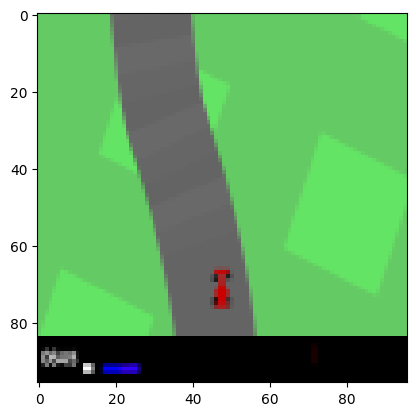

In [7]:
lp = LineProfiler()
lp_wrapper = lp(play_200step)
lp_wrapper()
lp.print_stats()